In [1]:
from sklearn.utils import shuffle 
import pandas as pd 
df = pd.read_csv('lyrics.csv')
df.sample(2)

lyric  label
1297  Fala aí pro seu dilema que seu Deus é bem maio...  samba
812   A paz do mundo Começa em mim Se eu tenho amor ...  forro

In [0]:
def cat_to_num(label):
    if label == 'axe':
        label = 0
    elif label == 'sertanejo':
        label = 1
    elif label == 'gospelreligioso':
        label = 2
    elif label == 'bossa-nova':
        label = 3
    elif label == 'forro':
        label = 4
    elif label == 'mpb':
        label = 5
    elif label == 'samba':
        label = 6
    
    return label

In [0]:
df['label'] = df['label'].apply(lambda l: cat_to_num(l))
df = shuffle(df)


In [4]:
pip install langdetect

     |████████████████████████████████| 1.0MB 3.5MB/s 
  Stored in directory: /root/.cache/pip/wheels/ec/0c/a9/1647275e7ef5014e7b83ff30105180e332867d65e7617ddafe
Successfully built langdetect


In [0]:
to_drop = []
for lyric, index in zip(df.lyric, df.index):
    if len(str(lyric)) <= 5:
        to_drop.append(index)
        
#df.loc[1026]
df.drop(to_drop, inplace=True)

In [6]:
from langdetect import detect

not_pt = []

for lyric, index in zip(df.lyric, df.index):
    #print(index)
    #print(detect(lyric))
    if(detect(lyric) != 'pt'):
        not_pt.append(index)

print(len(not_pt))

69


In [0]:
df.drop(not_pt, inplace=True)

In [0]:
import re 
import string 

data = [l.lower() for l in df.lyric.values] #to lower
labels = df.label.values
#string.punctuation

data_no_punctuation = []
for lyric in data: #remove punctuations
    str_ = ''
    for char in lyric:
        if char not in string.punctuation:
            str_ += char
    data_no_punctuation.append(str_)
    
data = data_no_punctuation
data = [[sentence.split()] for sentence in data]

data_alpha = []
for lyrics in data:
    lyric = []
    for sentence in lyrics:
        #print(sentence)
        for word in sentence:    
            if word.isalpha():
                lyric.append(word)

        data_alpha.append(lyric)

data = data_alpha
#from langdetect import detect >>> detect("War doesn't show who's right, just who's left.") 'en' >>> detect("Ein, zwei, drei, vier") 'de' `

In [0]:
word_map = {}

index = 0
for lyric in data:
    for word in lyric:
        if word not in word_map:
            word_map[word] = index
            index += 1

In [10]:
print(len(data))
print(len(labels))

1328
1328


In [11]:
data_num = []
for lyric in data:
    sentence_num = []
    
    for word in lyric:
        sentence_num.append(word_map[word])
    
    data_num.append(sentence_num)

print(len(data_num))
data_num

1328


[[0,
  1,
  2,
  3,
  2,
  4,
  5,
  6,
  7,
  0,
  1,
  2,
  3,
  2,
  4,
  5,
  6,
  7,
  8,
  9,
  8,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  2,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  15,
  30,
  31,
  32,
  33,
  14,
  34,
  35,
  36,
  37,
  31,
  6,
  38,
  39,
  40,
  41,
  8,
  42,
  43,
  44,
  45,
  44,
  46,
  47,
  48,
  8,
  49,
  50,
  51,
  52,
  53,
  49,
  54,
  55,
  56,
  34,
  35,
  27,
  57,
  58,
  59,
  60,
  29,
  61,
  62,
  47,
  63,
  64,
  16,
  65,
  16,
  66,
  29,
  67,
  68,
  17,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  20,
  80,
  81,
  82,
  59,
  83,
  84,
  85,
  86,
  87,
  39,
  88,
  89,
  90,
  91,
  14,
  15,
  92,
  93,
  94,
  95,
  85,
  96,
  95,
  97,
  98,
  99,
  100,
  29,
  101,
  31,
  102,
  103,
  104,
  105,
  27,
  28,
  106,
  20,
  30,
  59,
  41,
  33,
  107,
  100,
  39,
  59,
  108,
  38,
  109,
  110,
  56,
  111],
 [103,
  112,
  113,
  114,
  115,
  11

In [12]:
import numpy as np 

n_sentence = 1209
sentences_num = []
counts = []
for sentence in data_num:
    new_sentence = np.ones(n_sentence) * -1
    index = 0
    count = 0
    for num in sentence:
        count += 1
        new_sentence[index] = num
        index += 1
    sentences_num.append(new_sentence)
    counts.append(count)
    
print(sentences_num[:3])
print(max(counts))

[array([ 0.,  1.,  2., ..., -1., -1., -1.]), array([103., 112., 113., ...,  -1.,  -1.,  -1.]), array([189., 190., 146., ...,  -1.,  -1.,  -1.])]
1209


In [13]:
import numpy as np
n_train = int(len(data) * 0.8)

x_train = np.array(sentences_num[:n_train])
y_train = np.array(labels[:n_train])

x_test = np.array(sentences_num[n_train:])
y_test = np.array(labels[n_train:])

print(n_train)
print(len(data_num))

print(len(x_train))
print(len(x_test))

print(x_train.shape)
print(y_train.shape)

1062
1328
1062
266
(1062, 1209)
(1062,)


In [0]:
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
#from torch.utils.data import DataLoader

import torchvision
#import torchvision.transforms as transforms

In [0]:
class ConvNet(nn.Module):
  
      def __init__(self):
            super(ConvNet, self).__init__()

            #camada convolucional
            self.conv_layer = nn.Sequential(
                  nn.Conv2d(1, 1209, kernel_size=2),
                  #nn.BatchNorm2d(32),
                  nn.ReLU(inplace=True),
                  nn.Conv2d(1209, 64, kernel_size=2),
                  nn.ReLU(inplace=True),
                  #nn.MaxPool2d(kernel_size=2, stride=2),

                  #nn.Conv2d(64, 128, kernel_size=3),
                  #nn.ReLU(inplace=True),
                  #nn.Conv2d(128, 128, kernel_size=3),
                  #nn.ReLU(inplace=True),
                  #nn.MaxPool2d(kernel_size=2, stride=2),
                  #nn.Dropout2d(p=0.05),

                  #nn.Conv2d(128, 256, kernel_size=3),
                  #nn.ReLU(inplace=True),
                  #nn.MaxPool2d(kernel_size=2, stride=2),
            )
            
            # MLP
            self.fc_layer = nn.Sequential(
              nn.Linear(4096, 1024),
              nn.ReLU(inplace=True),
              nn.Linear(1024, 512),
              nn.ReLU(inplace=True),
              nn.Linear(512, 10)
            )
    
      def forward(self, x):  
        #print(x.shape)
        x = self.conv_layer(x)
        print(x.shape)
        x = x.view(x.size(0), -1)
        x = self.fc_layer(x)

        return x

In [0]:
class MLP(nn.Module):
  
      def __init__(self):
            super(MLP, self).__init__()
            
            # MLP
            self.fc = nn.Sequential(
              nn.Linear(1209, 1209),
              nn.ReLU(inplace=True),
              #nn.Dropout(0.25),
              nn.Linear(1209, 10),
              #nn.ReLU(inplace=True),
              #nn.Dropout(0.25),
              #nn.Linear(512, 10)
            )
    
      def forward(self, x):  
        #print("printing shape:")
        #print(x.shape)
        #x = x.view(x.size(0), -1)
        x = self.fc(x)

        return x

In [104]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [110]:
#model = ConvNet()
#print(model)
model = MLP()
print(model)

MLP(
  (fc): Sequential(
    (0): Linear(in_features=1209, out_features=1209, bias=True)
    (1): ReLU(inplace)
    (2): Linear(in_features=1209, out_features=10, bias=True)
  )
)


In [0]:
#print(torch.Tensor(x_train[:3]).shape)
#model(torch.Tensor(x_train[:3]))

#a = torch.Tensor(x_train[0]).resize_(1209, 1, 2, 2)#.shape
#model(a)

In [0]:
def evaluate(labels_pred, labels):
    correct = 0
    for pred, label in zip(labels_pred, labels):
        if pred == label:
            correct += 1
            
    return correct / len(labels) 

In [0]:
# Realizar o treinamento aqui
from torch.autograd import Variable


def fit(net):
    learning_rate = 0.001
    #loss_fn = torch.nn.NLLLoss()       
    loss_fn = torch.nn.CrossEntropyLoss()       
    #optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
    optimizer = torch.optim.Adam(net.parameters(), lr = learning_rate)
    
    epochs = 100
    labels_pred = []
    net = net.to(device)
    losses = []
    accuracies = []
    for epoch in range(epochs):
        preds = []
        loss_per_epoch = 0

        net.train()
        for lyric,label in zip(x_train, y_train):
            
            #print("label normal: ", label)
            
            lyric = lyric.reshape(1, 1209)
            lyric = Variable(torch.Tensor(lyric), requires_grad=True)
            label = Variable(torch.Tensor([label]), requires_grad=False)
            
            lyric = lyric.to(device)
            label = label.to(device)
            
            #print("label: ", label)
            optimizer.zero_grad()  

            pred = net(lyric)
            
            #print(pred)
            loss = loss_fn(pred, label.long())

            #loss = Variable(loss, requires_grad=True)
                
            _, label_pred = torch.max(pred, 1)
            
            labels_pred.append(label_pred.item())
            
            loss.backward()
            optimizer.step()

            with torch.no_grad():
                #print(loss.item())
                loss_per_epoch += loss.item()

        net.eval()
        loss_ = loss_per_epoch / len(x_train)
        losses.append(loss_)
        print("Epoch ({}/{}) - Loss {}".format(epoch, epochs, loss_))                
    
    print("Loss durante treinamento")
    plt.plot(losses)
    print("Acurácia") 
    acc = evaluate(labels_pred, y_train)
    print(acc*100)

Epoch (0/100) - Loss 784.680286261097
Epoch (1/100) - Loss 510.73562417326673
Epoch (2/100) - Loss 4.8190052226438365
Epoch (3/100) - Loss 2.5195641459269265
Epoch (4/100) - Loss 1.8891065021917195
Epoch (5/100) - Loss 1.8787917467833912
Epoch (6/100) - Loss 1.8707522600608582
Epoch (7/100) - Loss 1.8633950908305281
Epoch (8/100) - Loss 1.8610282044177227
Epoch (9/100) - Loss 1.9704070008182706
Epoch (10/100) - Loss 1.9352640920439683
Epoch (11/100) - Loss 1.863406977860043
Epoch (12/100) - Loss 1.8630036628627957
Epoch (13/100) - Loss 1.862744981173966
Epoch (14/100) - Loss 1.875482194167746
Epoch (15/100) - Loss 7.236429850821666
Epoch (16/100) - Loss 7.7048257507397855
Epoch (17/100) - Loss 5.190392136012543
Epoch (18/100) - Loss 2.048522945290007
Epoch (19/100) - Loss 1.9671167863739862
Epoch (20/100) - Loss 1.8806557134495392
Epoch (21/100) - Loss 1.8806374745404877
Epoch (22/100) - Loss 1.880627224449833
Epoch (23/100) - Loss 1.8786872746580738
Epoch (24/100) - Loss 2.11324456451

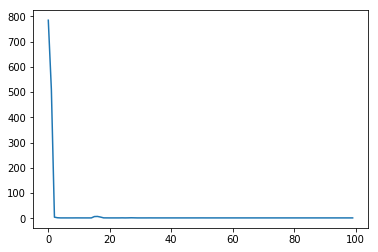

In [111]:
fit(model)